  ## **Predictioneer-IITB**
### *The model is made to predict deaths based on the location of where the viruses are most spread.*

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import requests
from tqdm import tqdm 
import tensorflow as tf

In [2]:
df = pd.read_csv('train_data.csv')
df.head()

,Lat,Long_,Deaths,Case_Fatality_Ratio
0,33.93911,67.709953,NaN,3.779217
1,41.15330,20.168300,NaN,1.077234
2,28.03390,1.659600,NaN,2.536905
3,42.50630,1.521800,165.0,0.345543
4,-11.20270,17.873900,NaN,1.836434


In [3]:
df.isnull().sum()

Lat                      91
Long_                    91
Deaths                 1558
Case_Fatality_Ratio      44
dtype: int64

### *Dropped Null Values for Data Cleaning*

In [5]:
df = df.dropna(subset=['Lat'])

In [6]:
df.head()

,Lat,Long_,Deaths,Case_Fatality_Ratio
0,33.93911,67.709953,NaN,3.779217
1,41.15330,20.168300,NaN,1.077234
2,28.03390,1.659600,NaN,2.536905
3,42.50630,1.521800,165.0,0.345543
4,-11.20270,17.873900,NaN,1.836434


In [8]:
df.isnull().sum()

Lat                       0
Long_                     0
Deaths                 1546
Case_Fatality_Ratio       3
dtype: int64

### *Dropped Null Values* 

In [9]:
df = df.dropna(subset=['Case_Fatality_Ratio'])

In [10]:
df.isnull().sum()

Lat                       0
Long_                     0
Deaths                 1546
Case_Fatality_Ratio       0
dtype: int64

### **Getting External Factor Temperature**

In [ ]:
# API_KEY = "226ad19ff1677850d8a73a2eda1e9bfe"
# BASE_URL = "https://api.openweathermap.org/data/2.5/weather"

# def get_temperature(lat, lon, api_key):
#     try:
#         response = requests.get(BASE_URL, params={
#             "lat": lat,
#             "lon": lon,
#             "appid": api_key,
#             "units": "metric"
#         })
#         data = response.json()
#         if response.status_code == 200:
#             return data['main']['temp']
#         else:
#             print(f"Error: {data.get('message', 'Unknown error')} (Lat: {lat}, Lon: {lon})")
#             return None
#     except Exception as e:
#         print(f"Exception occurred for Lat: {lat}, Lon: {lon} -> {e}")
#         return None

# temperatures = []

# for _, row in tqdm(df.iterrows(), total=len(df)):
#     lat = row['Lat']
#     lon = row['Long_']
#     temp = get_temperature(lat, lon, API_KEY)
#     temperatures.append(temp)


# df['Temperature'] = temperatures

### *Added an external feature by dowloading the 'Temperature' attribute and saved it in the .csv format*

In [12]:
# df.to_csv('cleandata_temp.csv')

In [14]:
df.head()

,Lat,Long_,Deaths,Case_Fatality_Ratio
0,33.93911,67.709953,NaN,3.779217
1,41.15330,20.168300,NaN,1.077234
2,28.03390,1.659600,NaN,2.536905
3,42.50630,1.521800,165.0,0.345543
4,-11.20270,17.873900,NaN,1.836434


In [4]:
data = pd.read_csv('cleandata_temp.csv')

In [5]:
data.head()

,Unnamed: 0,Lat,Long_,Deaths,Case_Fatality_Ratio,Temperature
0,0,33.93911,67.709953,NaN,3.779217,-12.18
1,1,41.15330,20.168300,NaN,1.077234,9.83
2,2,28.03390,1.659600,NaN,2.536905,20.47
3,3,42.50630,1.521800,165.0,0.345543,8.23
4,4,-11.20270,17.873900,NaN,1.836434,19.03


In [6]:
data.drop(columns=["Unnamed: 0"],inplace=True)


In [7]:
data.head()

,Lat,Long_,Deaths,Case_Fatality_Ratio,Temperature
0,33.93911,67.709953,NaN,3.779217,-12.18
1,41.15330,20.168300,NaN,1.077234,9.83
2,28.03390,1.659600,NaN,2.536905,20.47
3,42.50630,1.521800,165.0,0.345543,8.23
4,-11.20270,17.873900,NaN,1.836434,19.03


### *Scaled temperature attribute*

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data['Temperature'] = scaler.fit_transform(data[['Temperature']])


In [9]:
non_null = data[~data['Deaths'].isnull()]

In [10]:
non_null.head()

,Lat,Long_,Deaths,Case_Fatality_Ratio,Temperature
3,42.5063,1.5218,165.0,0.345543,0.128314
5,-71.9499,23.3470,0.0,0.000000,-2.449736
6,17.0608,-61.7964,146.0,1.603338,2.385126
9,-35.4735,149.0124,138.0,0.061360,1.320152
11,-12.4634,130.8456,84.0,0.081552,2.424698


## **Data Spliting**

In [11]:
X = non_null.drop('Deaths',axis='columns')
Y = non_null['Deaths']

In [12]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=42)

In [13]:
data.head()

,Lat,Long_,Deaths,Case_Fatality_Ratio,Temperature
0,33.93911,67.709953,NaN,3.779217,-2.247217
1,41.15330,20.168300,NaN,1.077234,0.314538
2,28.03390,1.659600,NaN,2.536905,1.552933
3,42.50630,1.521800,165.0,0.345543,0.128314
4,-11.20270,17.873900,NaN,1.836434,1.385331


# **Neural Network**

In [14]:
NN = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(xtrain.shape[1],)),  # Input layer
    tf.keras.layers.Dense(64, activation="relu"),  # Hidden layer 1
    tf.keras.layers.Dense(32, activation="relu"),  # Hidden layer 2
    tf.keras.layers.Dense(1, activation="linear")  # Output layer (Regression)
])

c:\Users\yashr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
NN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,009 (43.00 KB)

 Trainable params: 11,009 (43.00 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
NN.compile(optimizer="adam", loss="mean_absolute_error", metrics=["mae"])

In [17]:
history = NN.fit(xtrain, ytrain, epochs=1000, batch_size=32, validation_data=(xtest, ytest))

Epoch 1/1000
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 52.0798 - mae: 52.0798 - val_loss: 46.9947 - val_mae: 46.9947
Epoch 2/1000
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 47.0588 - mae: 47.0588 - val_loss: 46.3816 - val_mae: 46.3816
Epoch 3/1000
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 47.2369 - mae: 47.2369 - val_loss: 45.8683 - val_mae: 45.8683
Epoch 4/1000
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 46.8541 - mae: 46.8541 - val_loss: 45.6548 - val_mae: 45.6548
Epoch 5/1000
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 45.8570 - mae: 45.8570 - val_loss: 46.8086 - val_mae: 46.8086
Epoch 6/1000
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 47.8134 - mae: 47.8134 - val_loss: 45.5324 - val_mae: 45.5324
Epoch 7/1000
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 46.5677 - mae: 46.5677 - val_loss: 47.2973 - val_mae: 47.2973
Epoch 8/1000
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 46.4092 - mae: 46.4092 - val_loss: 45.6828 - val_mae: 45.6828
Epoch 9/1000
60/60 ━━━━━

## *Root Mean Square Error*

In [18]:
from sklearn.metrics import mean_squared_error
import numpy as np


y_pred_NN_final_1 = NN.predict(xtest)


mse_1 = mean_squared_error(ytest, y_pred_NN_final_1)


rmse_1 = np.sqrt(mse_1)

print(f"Root Mean Square Error (RMSE): {rmse_1}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Root Mean Square Error (RMSE): 48.48550255205255


In [19]:
test_loss, test_mae = NN.evaluate(xtest, ytest)
print(f"Test MAE: {test_mae}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35.7863 - mae: 35.7863 
Test MAE: 39.12321853637695


In [20]:
data_features = data.drop('Deaths',axis='columns')

### *Predicted deaths*

In [21]:
data['Deaths Predicted'] = NN.predict(data_features)

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [22]:
data.head()

,Lat,Long_,Deaths,Case_Fatality_Ratio,Temperature,Deaths Predicted
0,33.93911,67.709953,NaN,3.779217,-2.247217,277.997314
1,41.15330,20.168300,NaN,1.077234,0.314538,176.270355
2,28.03390,1.659600,NaN,2.536905,1.552933,243.795029
3,42.50630,1.521800,165.0,0.345543,0.128314,154.262939
4,-11.20270,17.873900,NaN,1.836434,1.385331,55.994732


In [23]:
data['Deaths'] = data['Deaths'].fillna(data['Deaths Predicted'])

In [24]:
data['Deaths'] = round(data['Deaths'])

In [25]:
data.drop('Deaths Predicted',axis='columns',inplace = True)

In [26]:
data.head()

,Lat,Long_,Deaths,Case_Fatality_Ratio,Temperature
0,33.93911,67.709953,278.0,3.779217,-2.247217
1,41.15330,20.168300,176.0,1.077234,0.314538
2,28.03390,1.659600,244.0,2.536905,1.552933
3,42.50630,1.521800,165.0,0.345543,0.128314
4,-11.20270,17.873900,56.0,1.836434,1.385331


In [27]:
data.loc[data['Deaths'] < 0,'Deaths'] = 0

### *Predicting confirmed cases*

In [42]:
data['CFR'] = data['Case_Fatality_Ratio'] / 100

In [43]:
data.head()

,Lat,Long_,Deaths,Case_Fatality_Ratio,Temperature,CFR
0,33.93911,67.709953,384.0,3.779217,-2.247217,0.037792
1,41.15330,20.168300,246.0,1.077234,0.314538,0.010772
2,28.03390,1.659600,237.0,2.536905,1.552933,0.025369
3,42.50630,1.521800,165.0,0.345543,0.128314,0.003455
4,-11.20270,17.873900,50.0,1.836434,1.385331,0.018364


In [44]:
data['confirmed cases'] = data['Deaths'] / data['CFR']

In [45]:
data['confirmed cases'] = round(data['confirmed cases'])

In [46]:
data.head()

,Lat,Long_,Deaths,Case_Fatality_Ratio,Temperature,CFR,confirmed cases
0,33.93911,67.709953,384.0,3.779217,-2.247217,0.037792,10161.0
1,41.15330,20.168300,246.0,1.077234,0.314538,0.010772,22836.0
2,28.03390,1.659600,237.0,2.536905,1.552933,0.025369,9342.0
3,42.50630,1.521800,165.0,0.345543,0.128314,0.003455,47751.0
4,-11.20270,17.873900,50.0,1.836434,1.385331,0.018364,2723.0


In [47]:
data.drop('CFR',axis='columns',inplace=True)

In [48]:
data.head()

,Lat,Long_,Deaths,Case_Fatality_Ratio,Temperature,confirmed cases
0,33.93911,67.709953,384.0,3.779217,-2.247217,10161.0
1,41.15330,20.168300,246.0,1.077234,0.314538,22836.0
2,28.03390,1.659600,237.0,2.536905,1.552933,9342.0
3,42.50630,1.521800,165.0,0.345543,0.128314,47751.0
4,-11.20270,17.873900,50.0,1.836434,1.385331,2723.0


### *Saved the final prediction for the train dataset*

In [49]:
# data.to_csv('final_predicted.csv')

In [3]:
df1 = pd.read_csv('final_predicted.csv')
df1.head()

,Unnamed: 0,Lat,Long_,Deaths,Case_Fatality_Ratio,Temperature,confirmed cases
0,0,33.93911,67.709953,384.0,3.779217,-2.247217,10161.0
1,1,41.15330,20.168300,246.0,1.077234,0.314538,22836.0
2,2,28.03390,1.659600,237.0,2.536905,1.552933,9342.0
3,3,42.50630,1.521800,165.0,0.345543,0.128314,47751.0
4,4,-11.20270,17.873900,50.0,1.836434,1.385331,2723.0


In [4]:
df1.drop('Unnamed: 0',axis='columns',inplace=True)

In [5]:
df1.head()

,Lat,Long_,Deaths,Case_Fatality_Ratio,Temperature,confirmed cases
0,33.93911,67.709953,384.0,3.779217,-2.247217,10161.0
1,41.15330,20.168300,246.0,1.077234,0.314538,22836.0
2,28.03390,1.659600,237.0,2.536905,1.552933,9342.0
3,42.50630,1.521800,165.0,0.345543,0.128314,47751.0
4,-11.20270,17.873900,50.0,1.836434,1.385331,2723.0


### *Correlation graph based on the new predicted Train dataset*

<Axes: >

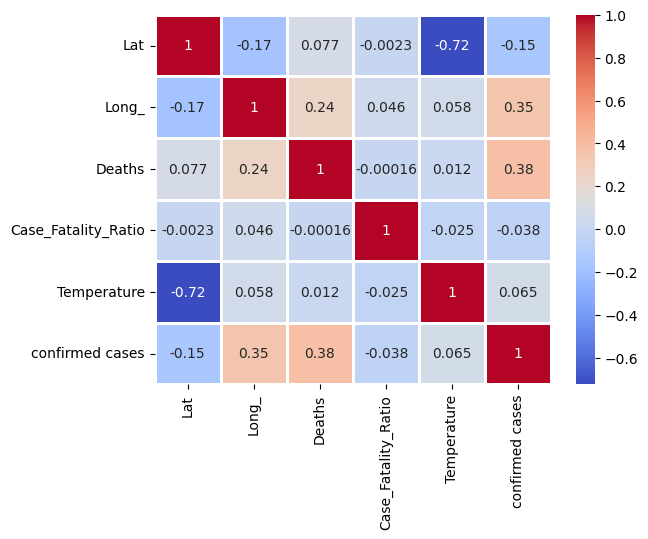

In [7]:
sns.heatmap(df1.corr(numeric_only= True), annot= True, cmap= 'coolwarm', linewidths=1)

In [6]:
df1.corr()

,Lat,Long_,Deaths,Case_Fatality_Ratio,Temperature,confirmed cases
Lat,1.000000,-0.173201,0.077437,-0.002341,-0.724213,-0.152322
Long_,-0.173201,1.000000,0.239128,0.046182,0.057949,0.347299
Deaths,0.077437,0.239128,1.000000,-0.000157,0.011987,0.382091
Case_Fatality_Ratio,-0.002341,0.046182,-0.000157,1.000000,-0.024590,-0.038372
Temperature,-0.724213,0.057949,0.011987,-0.024590,1.000000,0.065149
confirmed cases,-0.152322,0.347299,0.382091,-0.038372,0.065149,1.000000


In [8]:
df1 = df1[~df1['confirmed cases'].isin([np.inf, -np.inf])]

In [9]:
df1.dropna(inplace=True)

In [10]:
X_final = df1[['Lat','Long_','Temperature']]
Y_final = df1['confirmed cases']

### *Scaled the data was previouslt split up to train the model*

In [37]:
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
scaler_y = StandardScaler()

scaled_x = scaler_x.fit_transform(X_final)
sclaed_y = scaler_y.fit_transform(np.array(Y_final).reshape(-1, 1))

In [38]:
scaler_y.inverse_transform(sclaed_y)

array([[10161.],
       [22836.],
       [ 9342.],
       ...,
       [  598.],
       [ 6824.],
       [ 2214.]], shape=(3808, 1))

In [39]:
print(scaled_x.shape)  # ✅ Correct
print(sclaed_y.shape)


(3808, 3)
(3808, 1)


In [40]:
xtrain_final,xtest_final,ytrain_final,ytest_final = train_test_split(scaled_x,sclaed_y,test_size=0.2,random_state=42)

## **Model For Confirmed cases Prediction in Test**

In [41]:
model_NN = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(xtrain_final.shape[1],)),  # Input layer (Lat, Long, Temp)
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer 1
    tf.keras.layers.Dense(32, activation='relu'),  # Hidden layer 2
    tf.keras.layers.Dense(1, activation='linear')  # Output layer (Deaths, CFR, Confirmed Cases)
])

c:\Users\yashr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model_NN.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [43]:
history_nn = model_NN.fit(xtrain_final, ytrain_final, epochs=500, batch_size=32, validation_data=(xtest_final, ytest_final))

Epoch 1/500


96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.7327 - mae: 0.4136 - val_loss: 0.8325 - val_mae: 0.4313
Epoch 2/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7804 - mae: 0.3999 - val_loss: 0.8168 - val_mae: 0.4142
Epoch 3/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8392 - mae: 0.4182 - val_loss: 0.7662 - val_mae: 0.3729
Epoch 4/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4774 - mae: 0.3703 - val_loss: 0.7441 - val_mae: 0.3871
Epoch 5/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4546 - mae: 0.3544 - val_loss: 0.7238 - val_mae: 0.3595
Epoch 6/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5370 - mae: 0.3485 - val_loss: 0.7120 - val_mae: 0.3593
Epoch 7/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3022 - mae: 0.3306 - val_loss: 1.1931 - val_mae: 0.4150
Epoch 8/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3962 - mae: 0.3468 - val_loss: 0.7847 - val_mae: 0.3639
Epoch 9/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3232 - mae: 0.3

# Root Mean Squared Error

In [44]:
from sklearn.metrics import mean_squared_error
import numpy as np


y_pred_NN_final = model_NN.predict(xtest_final)


mse = mean_squared_error(ytest_final, y_pred_NN_final)


rmse = np.sqrt(mse)

print(f"Root Mean Square Error (RMSE): {rmse}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Root Mean Square Error (RMSE): 0.945020554922651


In [45]:
test_data = pd.read_csv('test_points.csv')
test_data.head()

,Lat,Long_
0,41.1533,20.1683
1,-71.9499,23.3470
2,-35.4735,149.0124
3,-34.9285,138.6007
4,47.5162,14.5501


In [46]:
test_data.dropna(inplace=True)

## **Getting Temperature through API**
    For test dataset

In [52]:
# API_KEY = "226ad19ff1677850d8a73a2eda1e9bfe"
# BASE_URL = "https://api.openweathermap.org/data/2.5/weather"

# def get_temperature(lat, lon, api_key):
#     try:
#         response = requests.get(BASE_URL, params={
#             "lat": lat,
#             "lon": lon,
#             "appid": api_key,
#             "units": "metric"
#         })
#         data = response.json()
#         if response.status_code == 200:
#             return data['main']['temp']
#         else:
#             print(f"Error: {data.get('message', 'Unknown error')} (Lat: {lat}, Lon: {lon})")
#             return None
#     except Exception as e:
#         print(f"Exception occurred for Lat: {lat}, Lon: {lon} -> {e}")
#         return None

# temperatures = []

# for _, row in tqdm(test_data.iterrows(), total=len(test_data)):
#     lat = row['Lat']
#     lon = row['Long_']
#     temp = get_temperature(lat, lon, API_KEY)
#     temperatures.append(temp)


# test_data['Temperature'] = temperatures

100%|██████████| 981/981 [09:40<00:00,  1.69it/s]  


In [53]:
test_data.tail()

,Lat,Long_,Temperature
999,49.213800,-2.135800,7.10
1000,-7.946700,-14.355900,23.16
1001,52.130700,-3.783700,5.27
1002,6.423800,-66.589700,23.15
1003,15.552727,48.516388,18.08


In [54]:
# test_data.to_csv('test_data_temp.csv')

In [55]:
test_data_temp = pd.read_csv('test_data_temp.csv')
test_data_temp.head()

,Unnamed: 0,Lat,Long_,Temperature
0,0,41.1533,20.1683,7.58
1,1,-71.9499,23.3470,-13.82
2,2,-35.4735,149.0124,24.60
3,3,-34.9285,138.6007,31.07
4,4,47.5162,14.5501,-2.88


In [56]:
test_data_temp.drop('Unnamed: 0',axis='columns',inplace=True)

In [57]:
test_data_temp.head()

,Lat,Long_,Temperature
0,41.1533,20.1683,7.58
1,-71.9499,23.3470,-13.82
2,-35.4735,149.0124,24.60
3,-34.9285,138.6007,31.07
4,47.5162,14.5501,-2.88


In [58]:
test_data_input_scaled = scaler_x.fit_transform(test_data_temp)

In [64]:
scaled_predict_NN = model_NN.predict(test_data_input_scaled)

test_data_temp['Confirmed Cases Predicted'] = scaler_y.inverse_transform(scaled_predict_NN)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step


In [68]:
test_data_temp['Confirmed Cases Predicted'] = round(test_data_temp['Confirmed Cases Predicted'])

# **Predicting Deaths**

In [69]:
X_final_2 = df1[['Lat','Long_','Temperature','confirmed cases']]
Y_final_2 = df1['Deaths']

In [70]:
from sklearn.preprocessing import StandardScaler

scaler_x_2 = StandardScaler()
scaler_y_2 = StandardScaler()

scaled_x_2 = scaler_x_2.fit_transform(X_final_2)
sclaed_y_2 = scaler_y_2.fit_transform(np.array(Y_final_2).reshape(-1, 1))

In [72]:
xtrain_final_2,xtest_final_2,ytrain_final_2,ytest_final_2 = train_test_split(scaled_x_2,sclaed_y_2,test_size=0.2,random_state=42)

In [77]:
model_NN_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(xtrain_final_2.shape[1],)),  # Input layer (Lat, Long, Temp)
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer 1
    tf.keras.layers.Dense(32, activation='relu'),  # Hidden layer 2
    tf.keras.layers.Dense(1, activation='linear')  # Output layer (Deaths, CFR, Confirmed Cases)
])

c:\Users\yashr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [78]:
model_NN_2.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [79]:
history_nn_2 = model_NN_2.fit(xtrain_final_2, ytrain_final_2, epochs=500, batch_size=32, validation_data=(xtest_final_2, ytest_final_2))

Epoch 1/500


96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6604 - mae: 0.5702 - val_loss: 0.4678 - val_mae: 0.4390
Epoch 2/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4393 - mae: 0.4350 - val_loss: 0.4333 - val_mae: 0.4305
Epoch 3/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4213 - mae: 0.4333 - val_loss: 0.3996 - val_mae: 0.4045
Epoch 4/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 0.3729 - mae: 0.4088 - val_loss: 0.3749 - val_mae: 0.4024
Epoch 5/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 0.3469 - mae: 0.3946 - val_loss: 0.3576 - val_mae: 0.3886
Epoch 6/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3531 - mae: 0.3987 - val_loss: 0.3465 - val_mae: 0.3895
Epoch 7/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3426 - mae: 0.3949 - val_loss: 0.3331 - val_mae: 0.3830
Epoch 8/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3302 - mae: 0.3784 - val_loss: 0.3527 - val_mae: 0.3922
Epoch 9/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 0.3213 - ma

## *RMSE for Death prediction model*

In [80]:
from sklearn.metrics import mean_squared_error
import numpy as np


y_pred_NN_final_2 = model_NN_2.predict(xtest_final_2)


mse_2 = mean_squared_error(ytest_final_2, y_pred_NN_final_2)


rmse_2 = np.sqrt(mse_2)

print(f"Root Mean Square Error (RMSE): {rmse_2}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Root Mean Square Error (RMSE): 0.5835220235331391


In [82]:
test_data_input_scaled_2 = scaler_x_2.fit_transform(test_data_temp)

In [83]:
scaled_predict_NN_2 = model_NN_2.predict(test_data_input_scaled_2)

test_data_temp['Deaths'] = scaler_y_2.inverse_transform(scaled_predict_NN_2)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step


In [86]:
test_data_temp.loc[test_data_temp['Deaths'] < 0,'Deaths'] = 0

In [87]:
test_data_temp.loc[test_data_temp['Confirmed Cases Predicted'] < 0,'Confirmed Cases Predicted'] = 0

## **Calculating CFR**

In [89]:
test_data_temp['Case_Fatality_Ratio'] = (test_data_temp['Deaths'] / test_data_temp['Confirmed Cases Predicted']) * 100

In [90]:
test_data_temp.head()

,Lat,Long_,Temperature,Confirmed Cases Predicted,Deaths,Case_Fatality_Ratio
0,41.1533,20.1683,7.58,23633.0,134.553146,0.569344
1,-71.9499,23.3470,-13.82,39657.0,157.687927,0.397629
2,-35.4735,149.0124,24.60,119515.0,180.409698,0.150952
3,-34.9285,138.6007,31.07,157693.0,145.358032,0.092178
4,47.5162,14.5501,-2.88,16708.0,85.914719,0.514213


In [91]:
test_data_temp.to_csv('final_predicted_test.csv')